# Jansen-MIDAS: a multi-level photomicrograph segmentation software based on isotropic undecimated wavelets

## Alexandre Fioravante de Siqueira<sup>1, 2</sup>, Flávio Camargo Cabrera<sup>2</sup>, Wagner Massayuki Nakasuga<sup>1, 2</sup>, Aylton Pagamisse<sup>3</sup>, Aldo Eloizo Job<sup>2</sup>

<sup>1</sup> _Departamento de Raios Cósmicos e Cronologia, IFGW, University of Campinas_

<sup>2</sup> _Departamento de Física, Química e Biologia, FCT, UNESP - Univ Estadual Paulista_

<sup>3</sup> _Departamento de Matemática e Computação, FCT, UNESP - Univ Estadual Paulista_

## Importing necessary packages.

In [1]:
from skimage.io import imread
from skimage.util import img_as_bool
from skimage.filters import (threshold_isodata, threshold_minimum, threshold_yen,
                             threshold_mean, threshold_triangle, threshold_li,
                             threshold_otsu)

from skimage.measure import compare_ssim
from skimage.transform import resize
from supmat_support import *

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Setting plot variables.

In [2]:
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']

warnings.filterwarnings('ignore')

## Reading test images `test1.jpg` and `test2.jpg`.

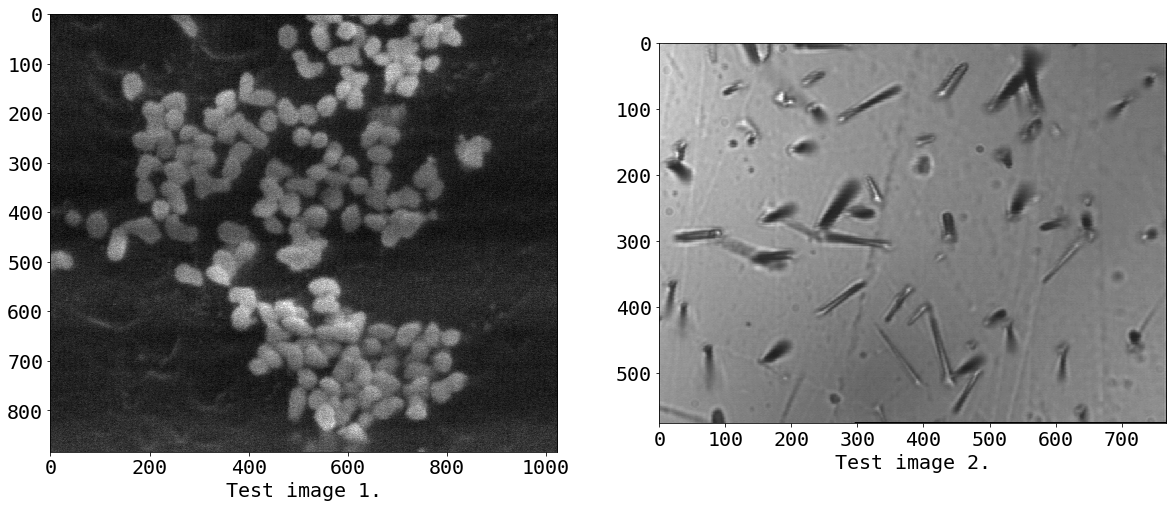

In [3]:
img_test1 = imread('Figures/test1.jpg', as_grey=True)
img_test2 = imread('Figures/test2.jpg', as_grey=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(img_test1, cmap='gray')
ax[0].set_xlabel('Test image 1.')

ax[1].imshow(img_test2, cmap='gray')
ax[1].set_xlabel('Test image 2.')
plt.show()

## Reading the ground truth of the test images, `test1_GT.jpg` and `test2_GT.jpg`.

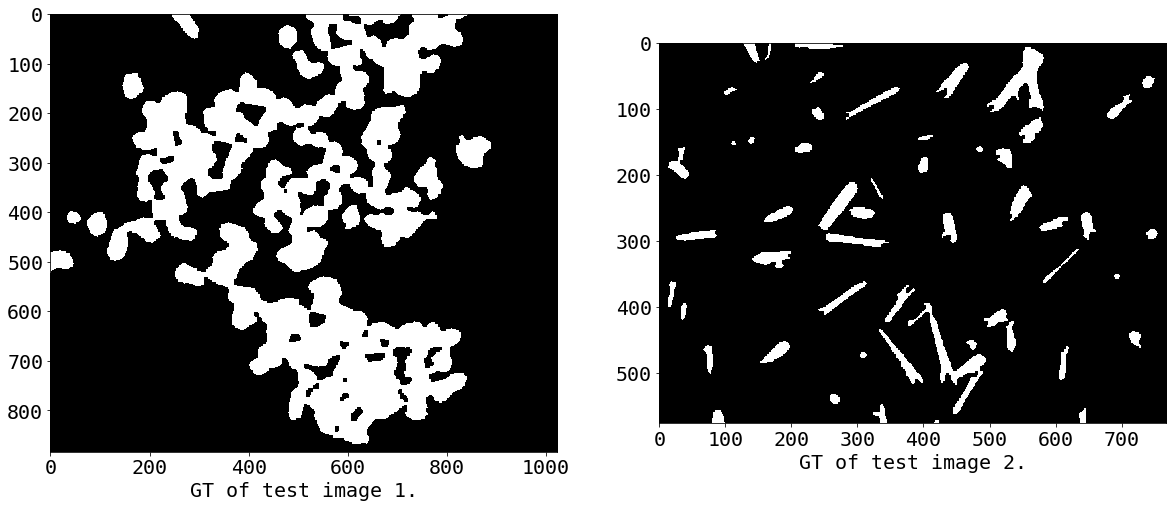

In [4]:
img_gt1 = img_as_bool(imread('Figures/test1_GT.jpg', as_grey=True))
img_gt2 = img_as_bool(imread('Figures/test2_GT.jpg', as_grey=True))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(img_gt1, cmap='gray')
ax[0].set_xlabel('GT of test image 1.')

ax[1].imshow(img_gt2, cmap='gray')
ax[1].set_xlabel('GT of test image 2.')
plt.show()

## Reading the MLSOS result of the test images, `test1_MLSOSL03L6.tif` and `test2_MLSOSL03L6.tif`.

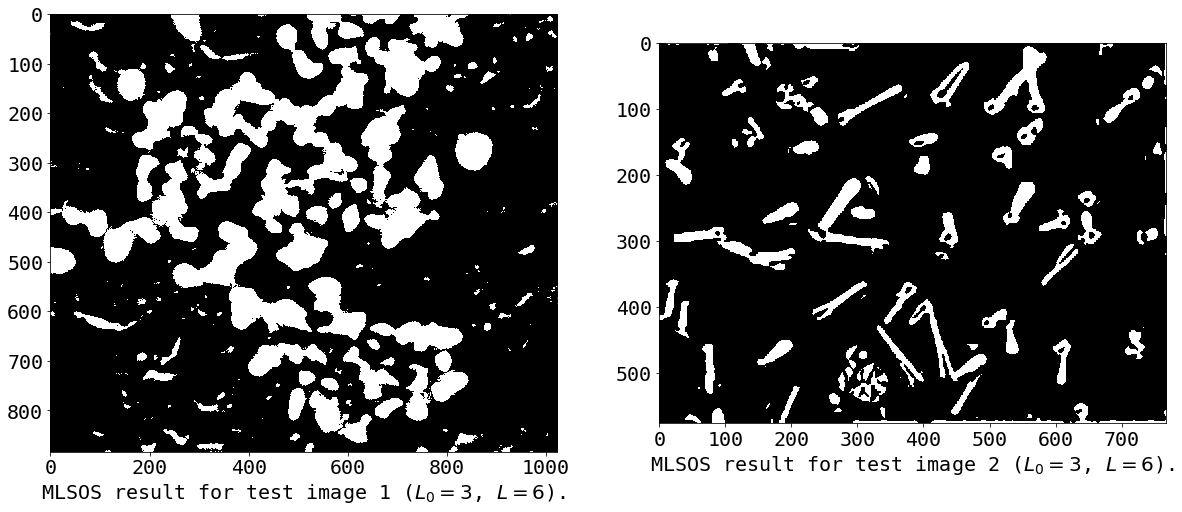

In [5]:
img_mlsosbin1 = img_as_bool(imread('Figures/test1_MLSOSL03L6.tif', as_grey=True))
img_mlsosbin1 = img_as_bool(resize(img_mlsosbin1, output_shape=(884, 1024)))

img_mlsosbin2 = img_as_bool(imread('Figures/test2_MLSOSL03L6.tif', as_grey=True))
img_mlsosbin2 = img_as_bool(resize(img_mlsosbin2, output_shape=(576, 768)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(img_mlsosbin1, cmap='gray')
ax[0].set_xlabel('MLSOS result for test image 1 ($L_0 = 3$, $L = 6$).')

ax[1].imshow(img_mlsosbin2, cmap='gray')
ax[1].set_xlabel('MLSOS result for test image 2 ($L_0 = 3$, $L = 6$).')
plt.show()

## Segmentation and comparison for test image 1.

### Obtaining each threshold.

In [6]:
dataset_bin1 = [img_test1 > threshold_isodata(img_test1),
                img_test1 > threshold_minimum(img_test1),
                img_test1 > threshold_yen(img_test1),
                img_test1 > threshold_mean(img_test1),
                img_test1 > threshold_triangle(img_test1),
                img_test1 > threshold_li(img_test1),
                img_test1 > threshold_otsu(img_test1),
                img_mlsosbin1]

### Obtaining SSIM for each threshold.

In [7]:
label_info1 = [' * ISODATA X GT: ', ' * Minimum X GT: ', ' * Yen X GT: ',
               ' * Mean X GT: ', ' * Triangle X GT: ', ' * Li X GT: ',
               ' * Otsu X GT: ', ' * MLSOS X GT: ']

print('SSIM - test1.jpg.')

for idx, img_bin1 in enumerate(dataset_bin1):
    print(label_info1[idx], compare_ssim(img_bin1, img_gt1))

SSIM - test1.jpg.
 * ISODATA X GT:  0.865700779506
 * Minimum X GT:  0.865700779506
 * Yen X GT:  0.815854134082
 * Mean X GT:  0.715361892034
 * Triangle X GT:  0.213501631907
 * Li X GT:  0.851034928043
 * Otsu X GT:  0.863225302782
 * MLSOS X GT:  0.785960559579


### Visual comparison between the thresholds and the GT for the image 1.

In [8]:
dataset_vis1 = []

for idx, img_bin1 in enumerate(dataset_bin1):
    dataset_vis1.append(visual_comparison(img_bin1, img_gt1))

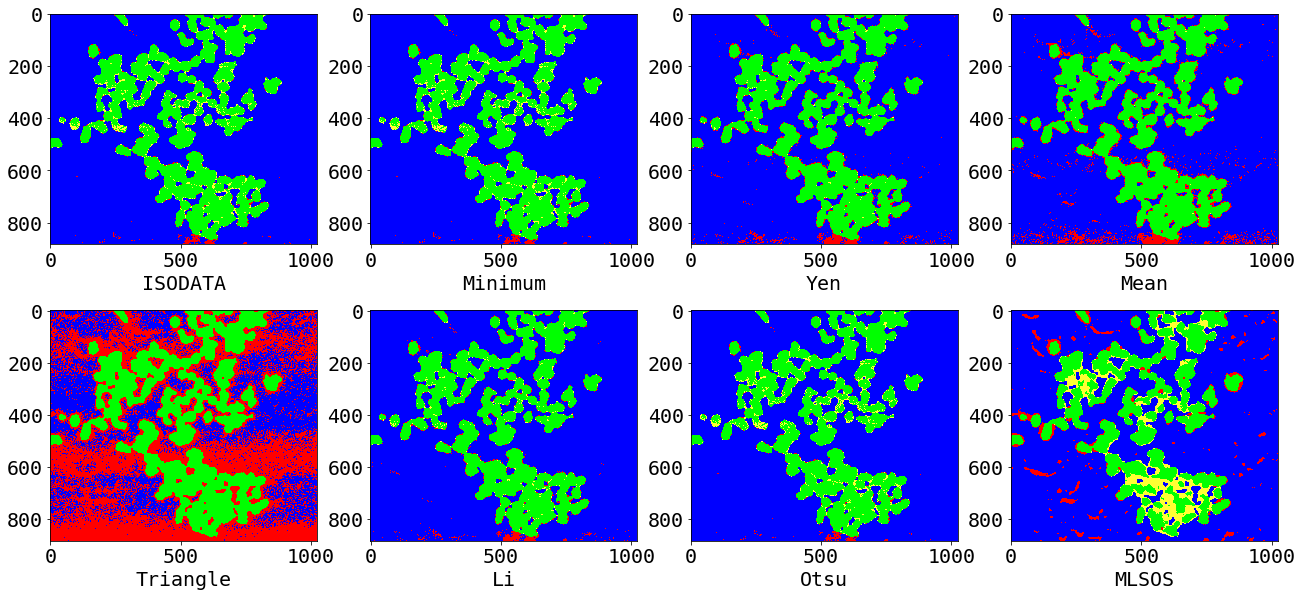

In [9]:
fig_comp1, ax_comp1 = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

ax_comp1[0, 0].imshow(dataset_vis1[0][0])
ax_comp1[0, 0].set_xlabel('ISODATA')
ax_comp1[0, 1].imshow(dataset_vis1[1][0])
ax_comp1[0, 1].set_xlabel('Minimum')
ax_comp1[0, 2].imshow(dataset_vis1[2][0])
ax_comp1[0, 2].set_xlabel('Yen')
ax_comp1[0, 3].imshow(dataset_vis1[3][0])
ax_comp1[0, 3].set_xlabel('Mean')
ax_comp1[1, 0].imshow(dataset_vis1[4][0])
ax_comp1[1, 0].set_xlabel('Triangle')
ax_comp1[1, 1].imshow(dataset_vis1[5][0])
ax_comp1[1, 1].set_xlabel('Li')
ax_comp1[1, 2].imshow(dataset_vis1[6][0])
ax_comp1[1, 2].set_xlabel('Otsu')
ax_comp1[1, 3].imshow(dataset_vis1[7][0])
ax_comp1[1, 3].set_xlabel('MLSOS')

plt.show()

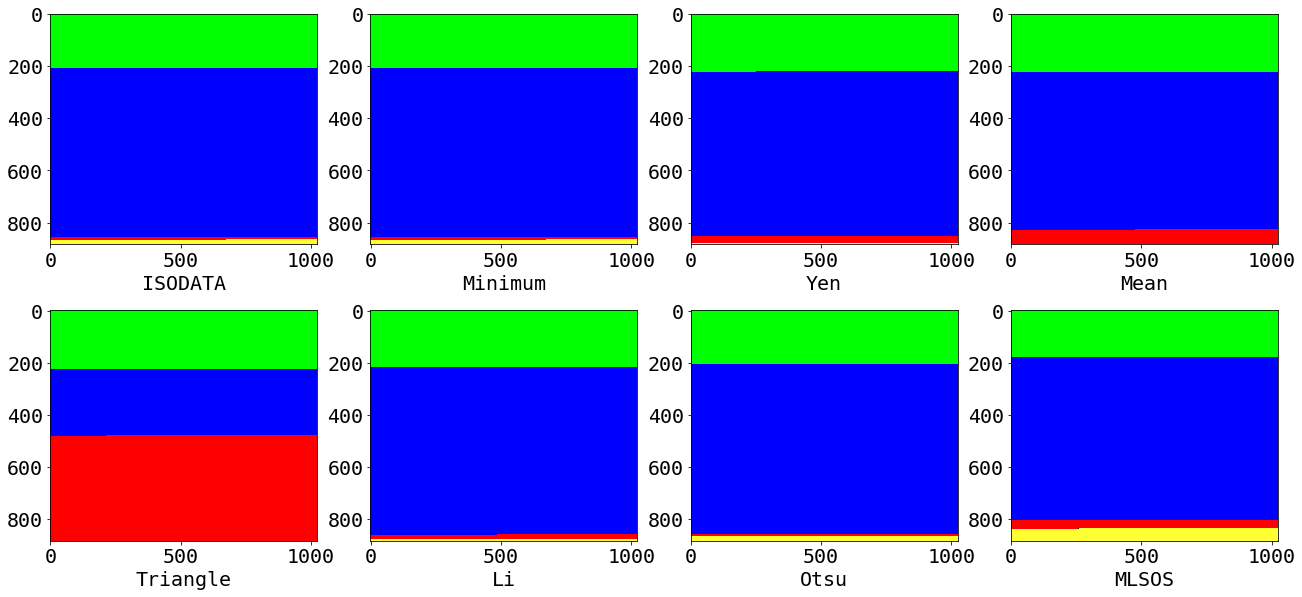

In [10]:
fig_px1, ax_px1 = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

ax_px1[0, 0].imshow(dataset_vis1[0][1])
ax_px1[0, 0].set_xlabel('ISODATA')
ax_px1[0, 1].imshow(dataset_vis1[1][1])
ax_px1[0, 1].set_xlabel('Minimum')
ax_px1[0, 2].imshow(dataset_vis1[2][1])
ax_px1[0, 2].set_xlabel('Yen')
ax_px1[0, 3].imshow(dataset_vis1[3][1])
ax_px1[0, 3].set_xlabel('Mean')
ax_px1[1, 0].imshow(dataset_vis1[4][1])
ax_px1[1, 0].set_xlabel('Triangle')
ax_px1[1, 1].imshow(dataset_vis1[5][1])
ax_px1[1, 1].set_xlabel('Li')
ax_px1[1, 2].imshow(dataset_vis1[6][1])
ax_px1[1, 2].set_xlabel('Otsu')
ax_px1[1, 3].imshow(dataset_vis1[7][1])
ax_px1[1, 3].set_xlabel('MLSOS')

plt.show()

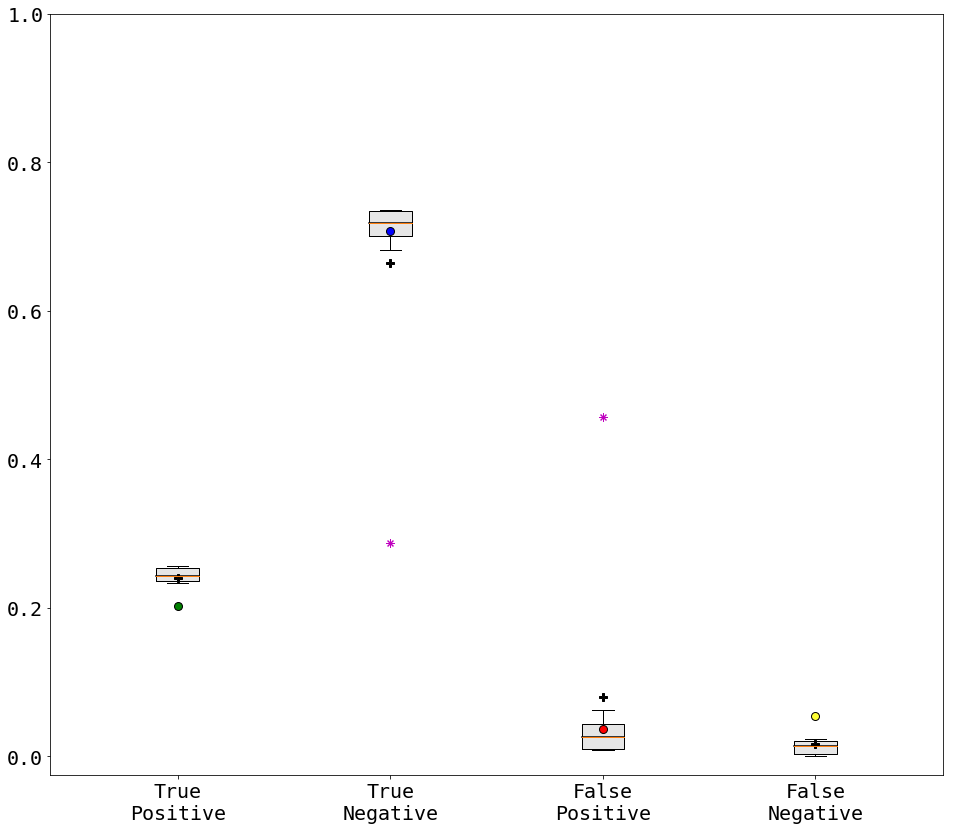

In [11]:
# normalizing TP, TN, FP and FN for each threshold result.
all_px1 = np.prod(img_gt1.shape)

dataset_normal1 = []

for data in dataset_vis1:
    dataset_normal1.append(np.asanyarray(data[2]) / all_px1)

pt_colors = ['g', 'b', 'r', '#ffff33']
pos = [1, 1.25, 1.5, 1.75]
mean_px1 = np.zeros(4)
dataset_normal1 = np.asanyarray(dataset_normal1)
num_boxes = len(dataset_normal1[0])
medians = list(range(num_boxes))

for idx, _ in enumerate(mean_px1):
    mean_px1[idx] = dataset_normal1[:, idx].mean()

labels = ['True\nPositive', 'True\nNegative', 'False\nPositive', 'False\nNegative']
width = (0.05, 0.05, 0.05, 0.05)

flier_props = dict(marker=(8, 2, 0.1), markerfacecolor='m', markersize=8,
                   markeredgecolor='m', linestyle='none')

fig, ax = plt.subplots(figsize=(16, 14))
box_plot = ax.boxplot(dataset_normal1, flierprops=flier_props, widths=width, positions=pos)

for i in range(num_boxes):
    box = box_plot['boxes'][i]
    boxX, boxY = [[] for _ in range(2)]
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = list(zip(boxX, boxY))
    box_polygon = mpatches.Polygon(box_coords,
                                   facecolor='0.9')
    ax.add_patch(box_polygon)

    med = box_plot['medians'][i]
    medianX, medianY = [[] for _ in range(2)]
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]

ax.set_xticklabels(labels)
plt.axis([0.85, 1.9, -0.025, 1])

for idx, px in enumerate(pos):
    ax.plot(px, dataset_normal1[-1][idx],
            'o', markersize=8, markeredgecolor='k',
            color=pt_colors[idx])
ax.plot(pos, mean_px1, 'P', markersize=8, color='k', markeredgecolor='k')
plt.show()

## Segmentation and comparison for test image 2.

### Obtaining each threshold.

In [12]:
dataset_bin2 = [img_test2 < threshold_isodata(img_test2),
                img_test2 < threshold_minimum(img_test2),
                img_test2 < threshold_yen(img_test2),
                img_test2 < threshold_mean(img_test2),
                img_test2 < threshold_triangle(img_test2),
                img_test2 < threshold_li(img_test2),
                img_test2 < threshold_otsu(img_test2),
                img_mlsosbin2]

### Obtaining the SSIM for each threshold. 

In [13]:
label_info2 = [' * ISODATA X GT: ', ' * Minimum X GT: ', ' * Yen X GT: ',
               ' * Mean X GT: ', ' * Triangle X GT: ', ' * Li X GT: ',
               ' * Otsu X GT: ', ' * MLSOS X GT: ']

print('SSIM - test2.jpg.')

for idx, img_bin2 in enumerate(dataset_bin2):
    print(label_info2[idx], compare_ssim(img_bin2, img_gt2))

SSIM - test2.jpg.
 * ISODATA X GT:  0.256758040247
 * Minimum X GT:  0.878675667981
 * Yen X GT:  0.961813334452
 * Mean X GT:  0.327576126922
 * Triangle X GT:  0.463485049384
 * Li X GT:  0.246249068033
 * Otsu X GT:  0.256758040247
 * MLSOS X GT:  0.853944739317


### Visual comparison between the thresholds and the GT for image 2.

In [14]:
dataset_vis2 = []

for idx, img_bin2 in enumerate(dataset_bin2):
    dataset_vis2.append(visual_comparison(img_bin2, img_gt2))

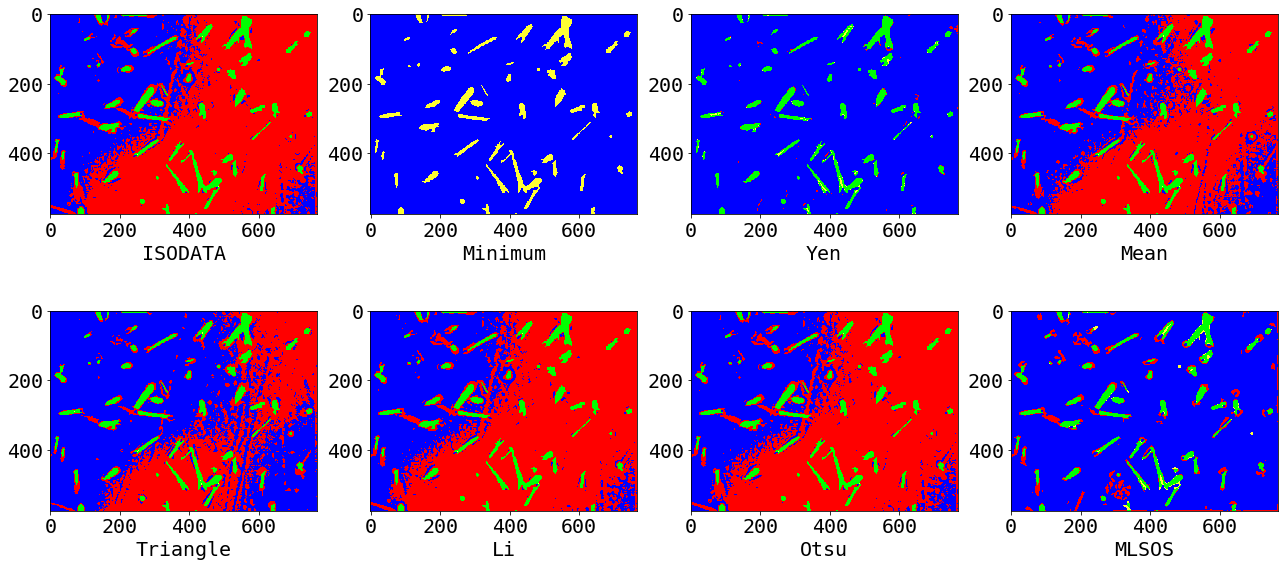

In [15]:
fig_comp2, ax_comp2 = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

ax_comp2[0, 0].imshow(dataset_vis2[0][0])
ax_comp2[0, 0].set_xlabel('ISODATA')
ax_comp2[0, 1].imshow(dataset_vis2[1][0])
ax_comp2[0, 1].set_xlabel('Minimum')
ax_comp2[0, 2].imshow(dataset_vis2[2][0])
ax_comp2[0, 2].set_xlabel('Yen')
ax_comp2[0, 3].imshow(dataset_vis2[3][0])
ax_comp2[0, 3].set_xlabel('Mean')
ax_comp2[1, 0].imshow(dataset_vis2[4][0])
ax_comp2[1, 0].set_xlabel('Triangle')
ax_comp2[1, 1].imshow(dataset_vis2[5][0])
ax_comp2[1, 1].set_xlabel('Li')
ax_comp2[1, 2].imshow(dataset_vis2[6][0])
ax_comp2[1, 2].set_xlabel('Otsu')
ax_comp2[1, 3].imshow(dataset_vis2[7][0])
ax_comp2[1, 3].set_xlabel('MLSOS')

plt.show()

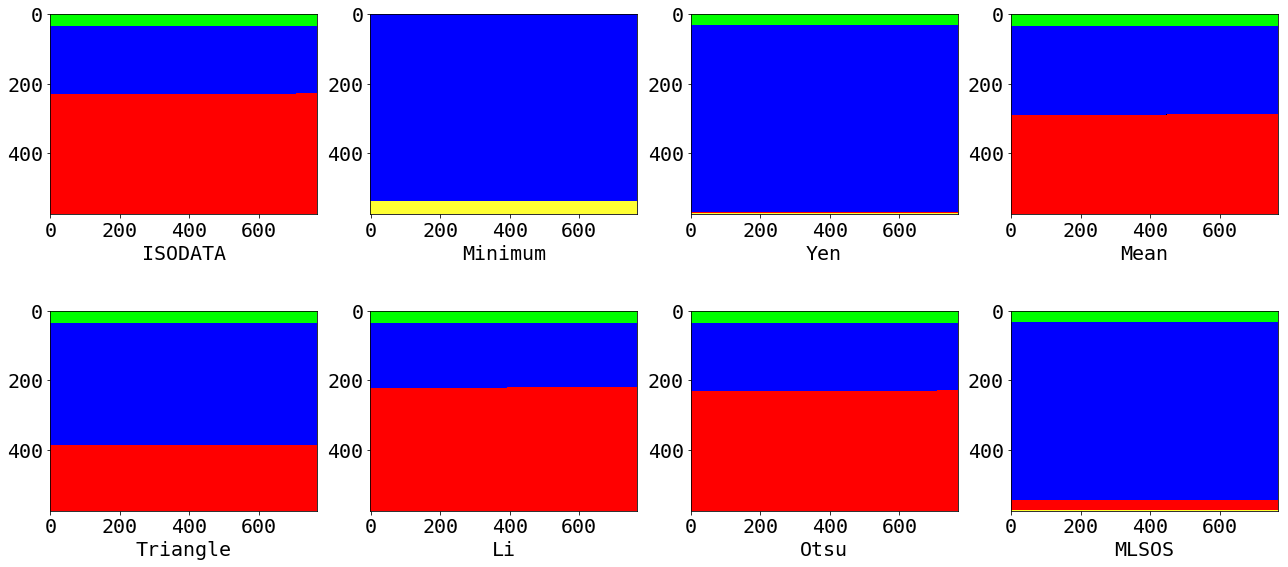

In [16]:
fig_px2, ax_px2 = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

ax_px2[0, 0].imshow(dataset_vis2[0][1])
ax_px2[0, 0].set_xlabel('ISODATA')
ax_px2[0, 1].imshow(dataset_vis2[1][1])
ax_px2[0, 1].set_xlabel('Minimum')
ax_px2[0, 2].imshow(dataset_vis2[2][1])
ax_px2[0, 2].set_xlabel('Yen')
ax_px2[0, 3].imshow(dataset_vis2[3][1])
ax_px2[0, 3].set_xlabel('Mean')
ax_px2[1, 0].imshow(dataset_vis2[4][1])
ax_px2[1, 0].set_xlabel('Triangle')
ax_px2[1, 1].imshow(dataset_vis2[5][1])
ax_px2[1, 1].set_xlabel('Li')
ax_px2[1, 2].imshow(dataset_vis2[6][1])
ax_px2[1, 2].set_xlabel('Otsu')
ax_px2[1, 3].imshow(dataset_vis2[7][1])
ax_px2[1, 3].set_xlabel('MLSOS')

plt.show()

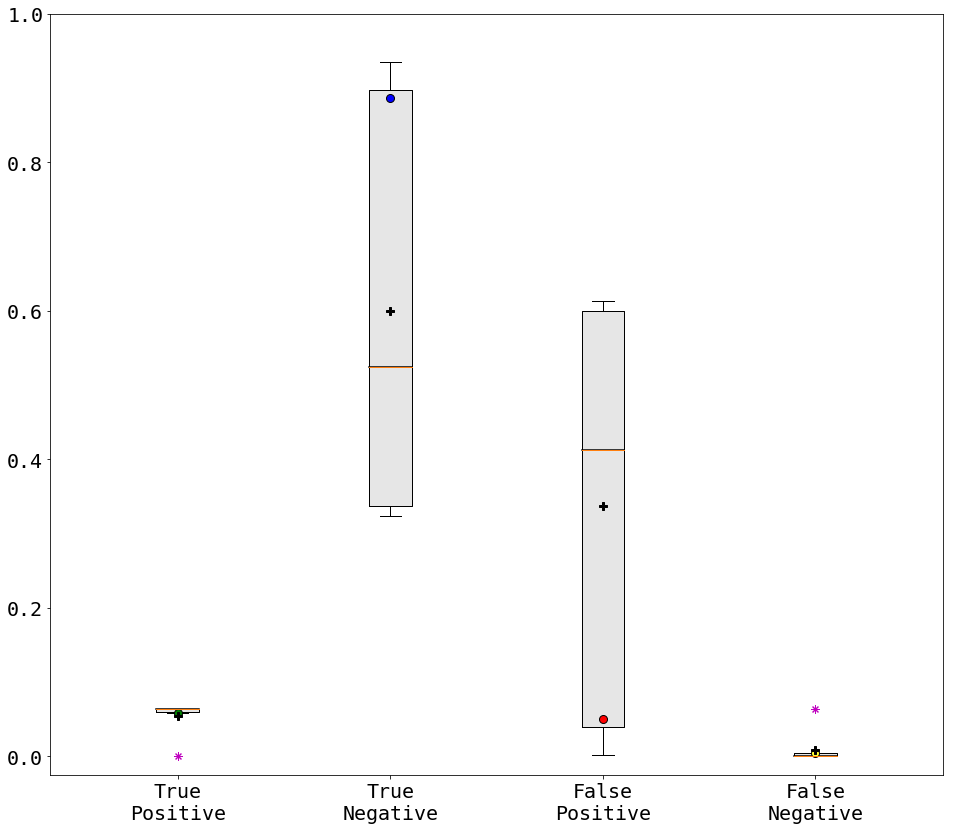

In [17]:
# normalizing TP, TN, FP and FN for each threshold result.
all_px2 = np.prod(img_gt2.shape)

dataset_normal2 = []

for data in dataset_vis2:
    dataset_normal2.append(np.asanyarray(data[2]) / all_px2)

# obtaining the mean for each column.
mean_px2 = np.zeros(4)

pt_colors = ['g', 'b', 'r', '#ffff33']
pos = [1, 1.25, 1.5, 1.75]
mean_px2 = np.zeros(4)
dataset_normal2 = np.asanyarray(dataset_normal2)
num_boxes = len(dataset_normal2[0])
medians = list(range(num_boxes))

for idx, _ in enumerate(mean_px2):
    mean_px2[idx] = dataset_normal2[:, idx].mean()

labels = ['True\nPositive', 'True\nNegative', 'False\nPositive', 'False\nNegative']
width = (0.05, 0.05, 0.05, 0.05)

flier_props = dict(marker=(8, 2, 0.1), markerfacecolor='m', markersize=8,
                   markeredgecolor='m', linestyle='none')

fig, ax = plt.subplots(figsize=(16, 14))
box_plot = ax.boxplot(dataset_normal2, flierprops=flier_props, widths=width, positions=pos)

for i in range(num_boxes):
    box = box_plot['boxes'][i]
    boxX, boxY = [[] for _ in range(2)]
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = list(zip(boxX, boxY))
    box_polygon = mpatches.Polygon(box_coords,
                                   facecolor='0.9')
    ax.add_patch(box_polygon)

    med = box_plot['medians'][i]
    medianX, medianY = [[] for _ in range(2)]
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]

ax.set_xticklabels(labels)
plt.axis([0.85, 1.9, -0.025, 1])

for idx, px in enumerate(pos):
    ax.plot(px, dataset_normal2[-1][idx],
            'o', markersize=8, markeredgecolor='k',
            color=pt_colors[idx])
ax.plot(pos, mean_px2, 'P', markersize=8, color='k', markeredgecolor='k')
plt.show()